<div style="background-color:#FFFFFF; padding:20px;">
  <h1 style="font-size:5em; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight:bold; color:#3E3E3E; text-align:center; text-shadow:2px 2px #F5F5F5; margin-bottom:0;">Marketing Campaign</h1>
  <p style="font-size:1.2em; font-family: 'Open Sans', Tahoma, Geneva, Verdana, sans-serif; font-weight:bold; color:#3E3E3E; text-align:center; margin-top:5px; margin-bottom:0;">Notebook Version: 1.0 | Author: Pranshu Chaurasia | Last Updated: April 15, 2023</p>
  <hr style="margin-top:5px; margin-bottom:5px;">
</div>

# Introduction
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It
helps a business to better understand its customers and makes it easier for them to
modify products according to the specific needs, behaviors and concerns of different
types of customers. </br>

# Problem Statement
Customer personality analysis helps a business to modify its product based on its target
customers from different types of customer segments. For example, instead of spending
money to market a new product to every customer in the company’s database, a
company can analyze which customer segment is most likely to buy the product and then
market the product only on that particular segment.

# Objective
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign so that who will respond to an offer for a product or service.

# Importing the required Libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Imporing the dataset

In [2]:
data=pd.read_csv(r'marketing_campaign.csv')

In [3]:
# Creating a copy of pandas dataframe
df = data.copy()

In [4]:
#Displaying 10 ramdom rows from the data
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1877,1399,1958,Graduation,Married,72905.0,0,0,2014-01-21,52,407,...,1,0,0,0,1,0,0,3,11,0
796,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,6,0,0,0,0,0,0,3,11,0
1603,800,1960,Graduation,Together,44512.0,1,1,2013-08-30,57,23,...,4,0,0,0,0,0,0,3,11,0
1366,2698,1976,Graduation,Single,47025.0,0,1,2013-11-07,52,254,...,6,0,0,0,0,0,0,3,11,0
1725,2634,1979,Master,Single,16653.0,1,0,2014-04-18,10,5,...,6,0,0,0,0,0,0,3,11,1
142,8690,1962,Graduation,Married,86111.0,0,0,2013-04-19,73,399,...,2,0,0,0,0,0,0,3,11,0
580,5966,1974,PhD,Married,45207.0,1,1,2012-11-10,64,203,...,6,0,1,0,0,0,0,3,11,0
603,895,1948,PhD,Married,61467.0,0,2,2012-12-09,69,410,...,5,0,0,0,0,0,0,3,11,0
2092,3107,1976,Graduation,Together,71322.0,0,1,2014-05-02,31,121,...,2,0,0,0,0,0,0,3,11,0
625,3641,1976,Graduation,Married,13624.0,1,0,2013-01-20,93,10,...,6,0,0,0,0,0,0,3,11,0


# Attribute Information:
<table>
<thead>
<tr>
<th>Column Name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>AcceptedCmp1</strong></td>
<td>1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp2</strong></td>
<td>1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp3</strong></td>
<td>1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp4</strong></td>
<td>1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>AcceptedCmp5</strong></td>
<td>1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
</tr>
<tr>
<td><strong>Complain</strong></td>
<td>1 if customer complained in the last 2 years</td>
</tr>
<tr>
<td><strong>DtCustomer</strong></td>
<td>date of customer’s enrolment with the company</td>
</tr>
<tr>
<td><strong>Education</strong></td>
<td>customer’s level of education</td>
</tr>
<tr>
<td><strong>Marital_Status</strong></td>
<td>customer’s marital status</td>
</tr>
<tr>
<td><strong>Kidhome</strong></td>
<td>number of small children in customer’s household</td>
</tr>
<tr>
<td><strong>Teenhome</strong></td>
<td>number of teenagers in customer’s household</td>
</tr>
<tr>
<td><strong>Income</strong></td>
<td>customer’s yearly household income</td>
</tr>
<tr>
<td><strong>MntFishProducts</strong></td>
<td>amount spent on fish products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntMeatProducts</strong></td>
<td>amount spent on meat products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntFruits</strong></td>
<td>amount spent on fruits products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntSweetProducts</strong></td>
<td>amount spent on sweet products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntWines</strong></td>
<td>amount spent on wine products in the last 2 years</td>
</tr>
<tr>
<td><strong>MntGoldProds</strong></td>
<td>amount spent on gold products in the last 2 years</td>
</tr>
<tr>
<td><strong>NumDealsPurchases</strong></td>
<td>number of purchases made with discount</td>
</tr>
<tr>
<td><strong>NumCatalogPurchases</strong></td>
<td>number of purchases made using catalogue</td>
</tr>
<tr>
<td><strong>NumStorePurchases</strong></td>
<td>number of purchases made directly in stores</td>
</tr>
<tr>
<td><strong>NumWebPurchases</strong></td>
    <td>number of purchases made through company’s web site</td>
 <tr>
<tr>
<td><strong>Recency</strong></td>
<td>number of days since the last purchase</td>
</tr>

<tr>
<td><strong>NumWebVisitsMonth</strong></td>
<td>number of visits to company’s web site in the last month</td>
</tr>

<tr>
<td><strong>Year_Birth</strong></td>
<td>Birth Year of Customer</td>
</tr>

<tr>
<td><strong>ID</strong></td>
<td>Unique Id </td>
</tr>

<tr>
<td><strong>Z_CostContact</strong></td>
<td>Cost to contact a customer</td>
</tr>

<tr>
<td><strong>Z_Revenue</strong></td>
<td>Revenue after client accepting campaign</td>
</tr>

<td><strong>Response (Target Variable)</strong></td>
<td>1 if customer accepted the offer in the last campaign, 0 otherwise</td>
</tr>

# Exploratory Data Analysis

In [5]:
# Checking size of data
df.shape

(2240, 29)

We see that the total rows are 2240 and total columns are 29.

In [6]:
# General info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Null Value Removal

In [7]:
#Checking if NULL values are present in dataset
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**We see that 24 rows have NULL value in Income**

In [8]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
null_counts*100

Income                 1.071429
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

We see that column **'Income'** constitutes about **'1.071429%'** of total values. **We will drop the rows having missing values and check the distribution, if the distribution changes, we will impute the missing values.**

In [9]:
#Creating a copy as it is a good practice
df_copy = df.copy()

In [10]:
drop_df = df_copy.dropna()
drop_df.shape

(2216, 29)

 We have dropped NULL values and we will plot pdf for both before and after dropping the missing values, to check if the distribution is changed.

In [11]:
# Remove columns name which are not objects and 'ID' and 'Year_Birth'
non_object_columns = df.select_dtypes(exclude=['object']).columns
column_names = list(non_object_columns)
column_names.remove('ID')
column_names.remove('Year_Birth')
print(column_names)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


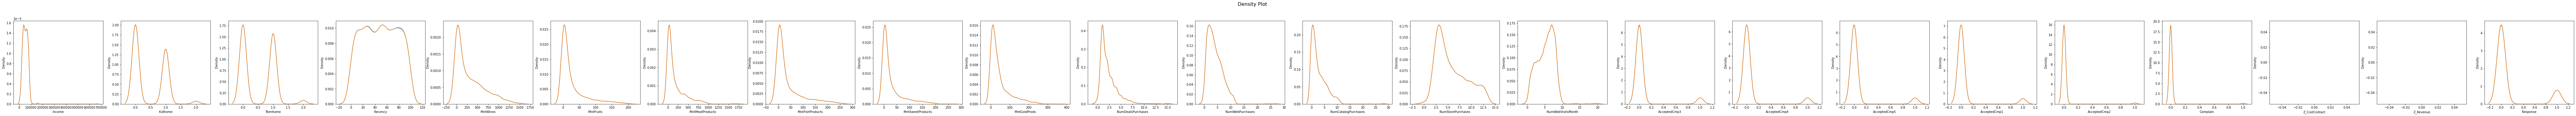

In [12]:
# Density plot using seaborn library
fig, axes = plt.subplots(nrows=1, ncols=len(column_names), figsize=(150, 5))

for i, col in enumerate(column_names): 
    # Plot density plot for 'Income' column in drop_df
    sns.kdeplot(drop_df[col], ax=axes[i], label='Dropped Rows')
    # Plot density plot for 'Income' column in df_copy
    sns.kdeplot(df_copy[col], ax=axes[i], label='Original Rows')

# Add title and labels
fig.suptitle('Density Plot', fontsize=16, y=1.05)
for i, ax in enumerate(axes):
    ax.set_xlabel(column_names[i])
    ax.set_ylabel('Density')
    
# Show the plot
plt.show()

We see that there is no impact in pdf for the features. Hence, we can go ahead with dropped dataframe.

In [13]:
df=drop_df.copy()

# Outliers Detection and Removal

In [31]:
# Collecting all the numerical dataset
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

In [30]:
# Plot the box plot using plotly on the numerical dataset num_df
fig = px.box(num_df)
# Show the plot
fig.show()

We see that the outliers are present in Income, we will identify and remove the outliers.

In [43]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (q1 - 1.5 * iqr)) | (df['Income'] > (q3 + 1.5 * iqr))]

# Get the upper and lower threshold limit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Upper limit 118350.5
Lower limit -14525.5
Number of outliers in the Income column: 8


In [45]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (q1 - 1.5 * iqr)) | (df['Income'] > (q3 + 1.5 * iqr)))]

In [47]:
# The outliers for Income have been removed. 
df.shape

(2208, 29)

In [ ]:
# Plotting the box plot to confirm the same for Income.